In [403]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from matplotlib.pyplot import figure
import matplotlib.colors
import time
from statistics import mean
from scipy import special
from scipy import fft, ifft
import scipy.linalg as la
from functools import partial
import scipy.integrate as integrate
from scipy.integrate import quad
%matplotlib inline

In [387]:
def fBM_V1(seed = 0, T = 1, N = 100, H = 0.1):
    #Cholesky Method
    np.random.seed(seed)
    
    dt = T/N
    
    R = np.zeros((N+1, N+1))
    
    for i in range(N+1):
        for j in range(N+1):
            R[i][j] = (j**(2*H) + i**(2*H) - abs(j-i)**(2*H))/2
            

    
    R = np.delete(R, 0, 0)
    R = np.delete(R, 0, 1)
    

    
    Sigma = np.linalg.cholesky(R)
    

    
    v = np.random.randn(N)
    

    
    u = np.matmul(Sigma, v)
    

    u = np.array([0] + list(u))
    
    plt.plot(u)

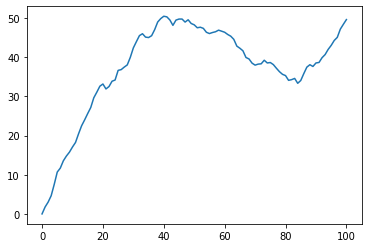

In [389]:
fBM_V1(N=100, H=0.8)

In [360]:
def fBM_V3(seed = 0, T = 1, N = 100, H = 0.1):
    i = np.complex(0,1)

    #Circulant Embedding
    np.random.seed(seed)
    
    n = 2**int(np.floor(np.log2(N)))
    
    r = np.zeros(2*n)
    
    def gamma(k, h):
        return 1/2 * (np.abs(k-1)**(2*h) - 2*np.abs(k)**(2*h) + np.abs(k+1)**(2*h))
    
    for j in range(n):
        r[j] = gamma(k=j, h=H)
    
    for j in range(n-1):
        r[2*n-1-j] = gamma(k=j+1, h=H)
        
        

    j = np.arange(0,2*n);   k = 2*n-1
    lam = fft.fft(r*np.exp(2*np.pi*complex(0,1)*k*j*(1/(2*n))))
    
    sqrt_lam = np.sqrt(lam)
    
    V1 = np.random.randn(n+1)
    V2 = np.random.randn(n+1)

    w = np.zeros(2*n, dtype = np.complex)
    w[0] = sqrt_lam[0] * np.sqrt(1/2*n) * V1[0]
    
    for k in range(1,n):
        w[k] = sqrt_lam[k] * np.sqrt(1/4*n) * (V1[k] +complex(0,1)*V2[k])
        
    w[n] = sqrt_lam[n] * np.sqrt(1/2*n) * V1[n]
    
    for k in range(1,n):
        w[n+k] = sqrt_lam[n+k] * np.sqrt(1/4*n) *(V1[n+1-k] -complex(0,1)*V2[n+1-k])

    Z = fft.fft(w)
    fGN = Z[0:n]
    fBM = np.cumsum(fGN)*(N**(-H))
    fBM = (T**H)*(fBM)
    
    path = np.array([0] + list(fBM))
#     B = np.zeros(n+1)
#     B[1] = Z[0]
#     for i in range(2, n+1):
#         B[i] = Z[i-2] + Z[i-1]
        
    return path

C:\Users\Nikhil\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Nikhil\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Nikhil\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Nikhil\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Nikhil\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


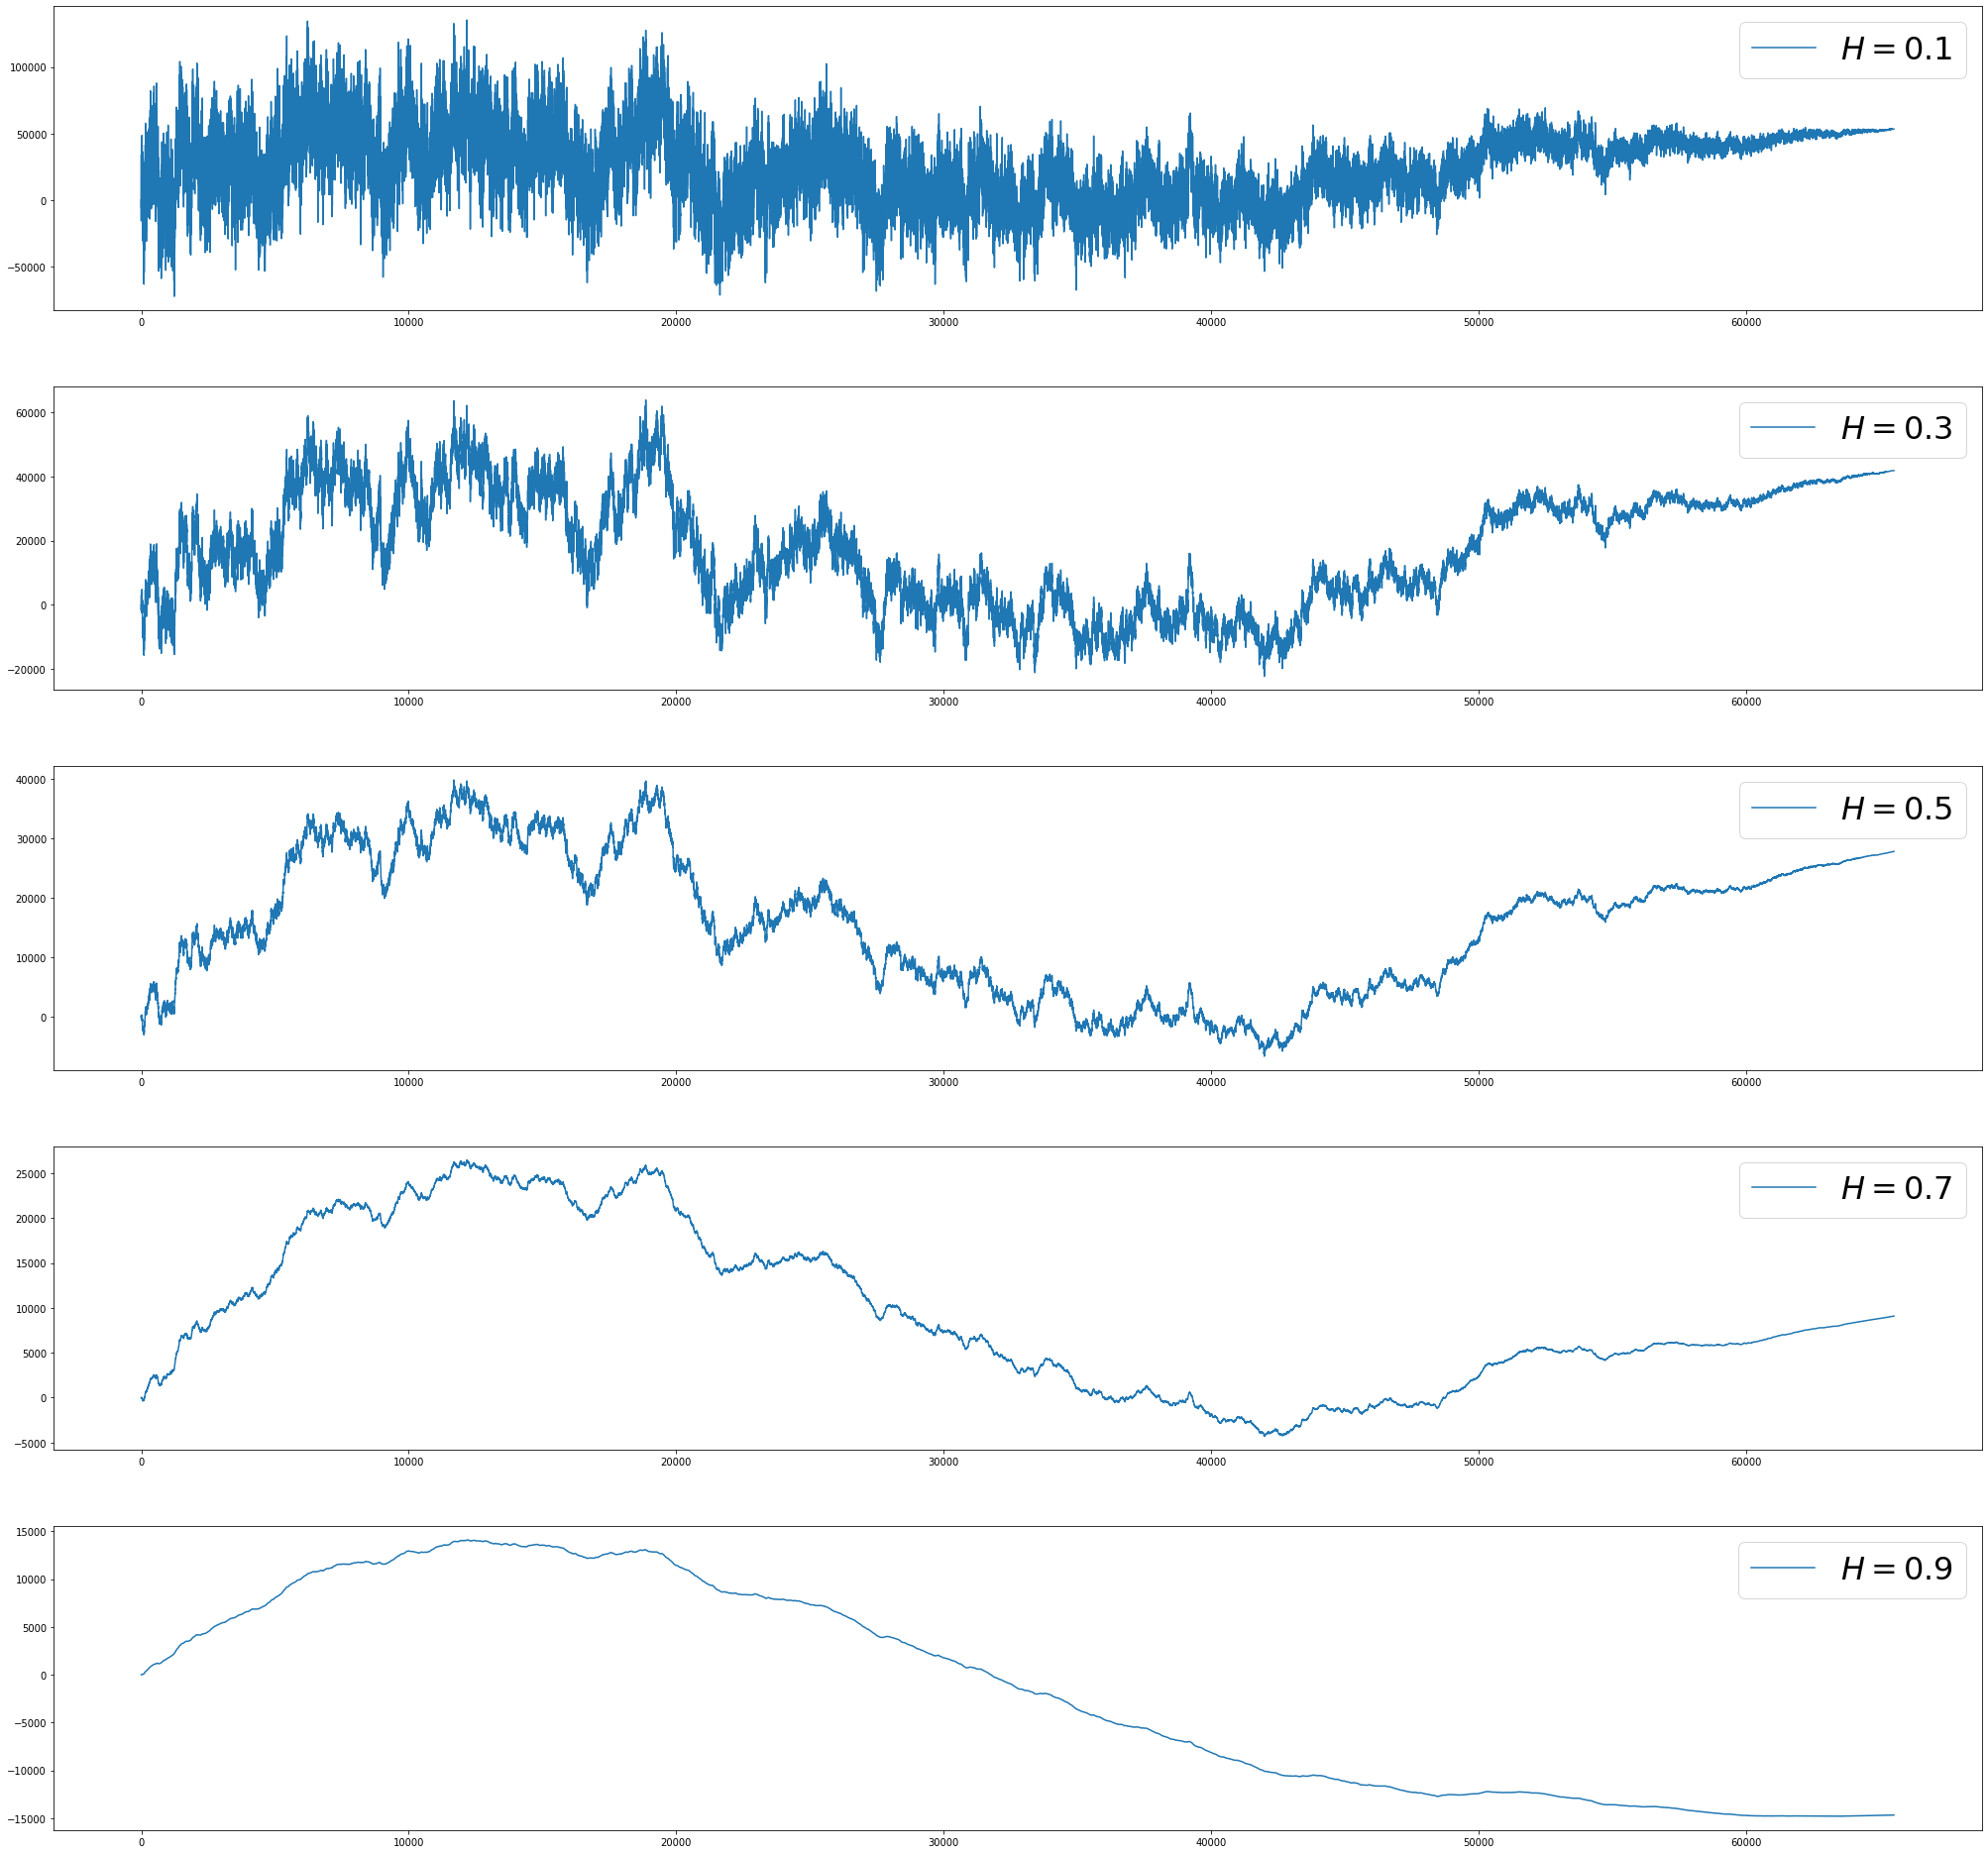

In [381]:
k = [0.1, 0.3, 0.5, 0.7, 0.9]
data = []

for h in k:
    data.append(fBM_V3(N=100000, H=h))
    
fig, axs = plt.subplots(len(k),1)
fig.tight_layout()
fig.set_size_inches(30, 30)
plt.subplots_adjust(wspace=0.3, hspace=0.25)
for j in range(len(k)):
    axs[j].plot(data[j], label=f"$H=${k[j]}")
    axs[j].legend(loc=1,prop={'size': 32})

fig.savefig("fBM.png", bbox_inches='tight')

In [384]:
2**int(np.floor(np.log2(100000)))

65536